In [1]:
#http://old.apmath.spbu.ru/ru/structure/depts/is/task5-2013.pdf
%matplotlib inline
import math as m
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

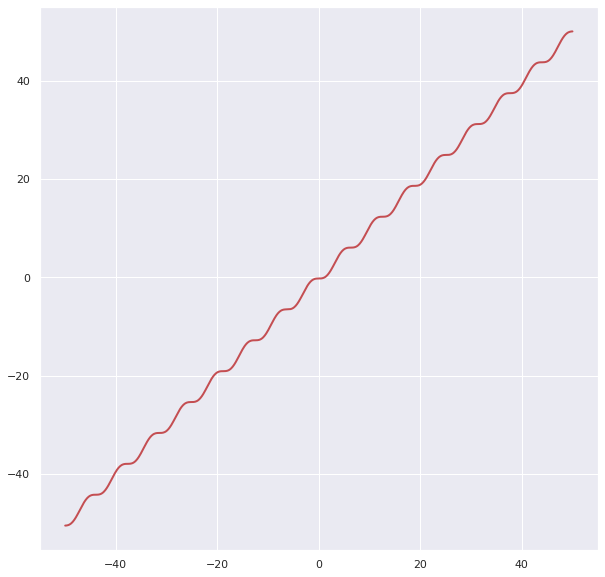

In [2]:
def f(x):
    return x - np.sin(x) - 0.25
    #return np.abs(x)*(x - np.sin(x) - 0.25) #для второго примера
x_test = np.linspace(-50,50,num = 1000)
y_test = f(x_test)
fig, ax = plt.subplots()
ax.plot(x_test,y_test, 'r', linewidth=2)
fig.set_size_inches(10, 10)
plt.show()

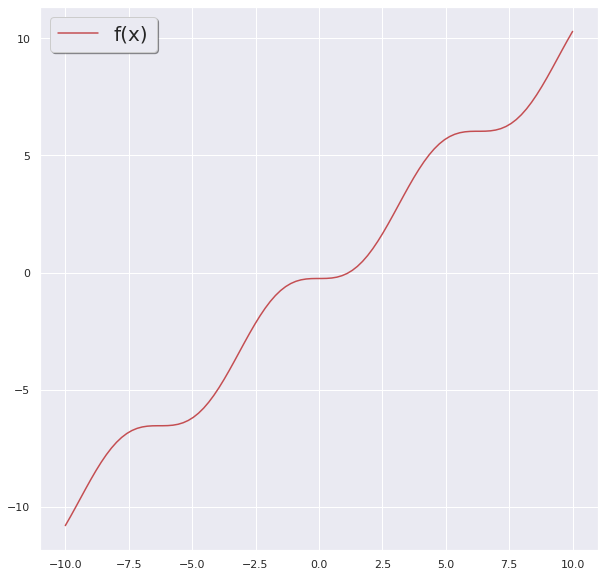

In [3]:
n = 10
a = -10
b = 10
z = (b - a)/n

x = np.linspace(a, b, num = 100)
y = [f(i) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y, label = 'f(x)', c = 'r')
ax.legend(loc='upper left', shadow=True, fontsize=20)
ax.grid(True)
fig.set_size_inches(10, 10)

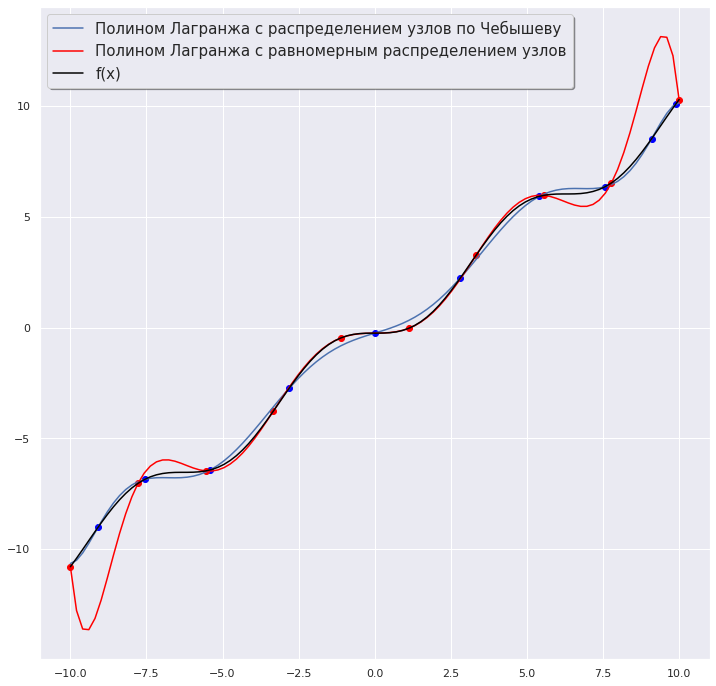

In [4]:
x_even = np.linspace(a, b, n) #равномерное распределение узлов
y_even = [f(i) for i in x_even]

def chebyshev(i):
    return (1/2)*((b-a)*m.cos(((2*i+1)/(2*(n+1)))*m.pi) + (b + a)) #(3.2)

x_cheb = [chebyshev(i) for i in range(0, n)][::-1] #распределение узлов по Чебышеву
y_cheb = [f(i) for i in x_cheb]

#Построение полинома Лагранжа
def l_k(x, k, nodes):
    upper = 1
    lower = 1
    for i in range (0,n):
        if i == k:
            continue
        upper *= (x - nodes[i])
        lower *= (nodes[k]- nodes[i])
    return (upper/lower)

def Lagrange(x, nodes):
    Pn = 0
    for i in range(0,n):
        Pn += l_k(x, i, nodes)*f(nodes[i])
    return Pn

y_cheb_lagrange = [Lagrange(i, x_cheb) for i in x]
y_even_lagrange = [Lagrange(i, x_even) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y_cheb_lagrange, label = 'Полином Лагранжа с распределением узлов по Чебышеву')
ax.plot(x, y_even_lagrange, c = 'red', label = 'Полином Лагранжа с равномерным распределением узлов')
ax.plot(x, y, c = 'black', label = 'f(x)')
ax.scatter(x_cheb, y_cheb, c = 'blue')
ax.scatter(x_even, y_even, c = 'red')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 12)

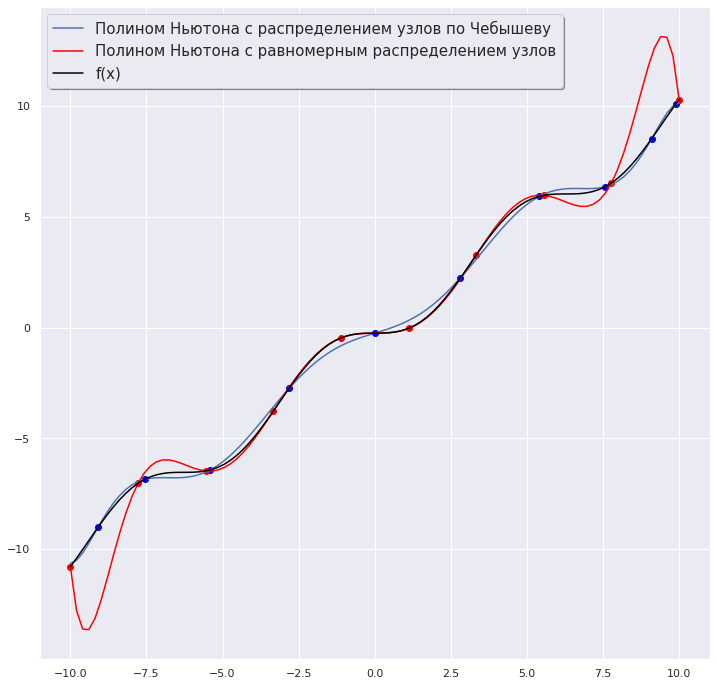

In [5]:
#Построение полинома Ньютона
def w_k_i(x, degree, nodes, k):
    result = 1
    for i in range(0, degree):
        if i == k:
            continue
        result *= (x - nodes[i])
    return result

def A_i(degree, nodes):
    result = 0
    degree+=1
    for i in range(0, degree):
        result += f(nodes[i])/w_k_i(nodes[i], degree, nodes, i)
    return result

def Newton(x, nodes):
    result = 0
    for i in range(0,n):
        result += A_i(i,nodes)*w_k_i(x, i, nodes, -1)
    return result

y_cheb_newton = [Newton(i, x_cheb) for i in x]
y_even_newton = [Newton(i, x_even) for i in x]

fig, ax = plt.subplots()
ax.plot(x, y_cheb_newton, label = 'Полином Ньютона с распределением узлов по Чебышеву')
ax.plot(x, y_even_newton, c = 'red', label = 'Полином Ньютона с равномерным распределением узлов')
ax.plot(x, y, c = 'black', label = 'f(x)')
ax.scatter(x_cheb, y_cheb, c = 'blue')
ax.scatter(x_even, y_even, c = 'red')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(12, 12)

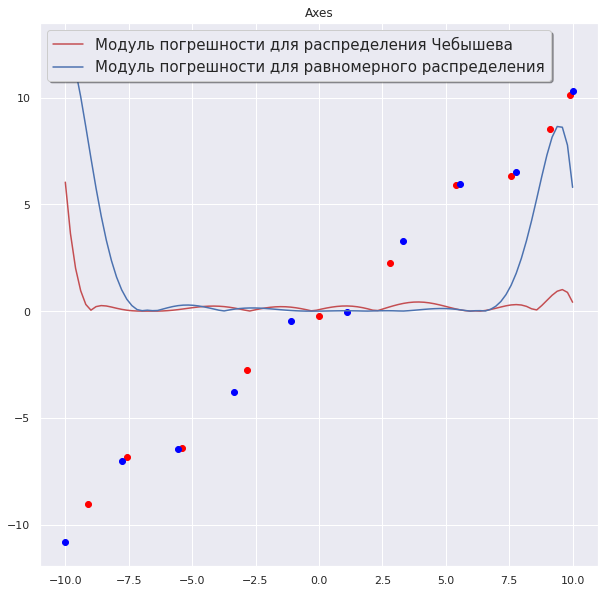

In [7]:
#Погрешности
def absolute_error(f, f_new):
    if f - f_new != 0:
        return np.abs(f - f_new)

chebyshev_absolute_error = [absolute_error(f(i), Lagrange(i, y_cheb)) for i in x]
even_absolute_error = [absolute_error(f(i), Lagrange(i, y_even)) for i in x]

fig, ax = plt.subplots()
ax.set(title='Axes')
ax.plot(x, chebyshev_absolute_error, c ='r', label = 'Модуль погрешности для распределения Чебышева')
ax.plot(x, even_absolute_error, label = 'Модуль погрешности для равномерного распределения')
ax.scatter(x_cheb, y_cheb, c = 'red')
ax.scatter(x_even, y_even, c = 'blue')
ax.legend(loc='upper left', shadow=True, fontsize=15)
ax.grid(True)
fig.set_size_inches(10, 10)